In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, RocCurveDisplay

# Step 2: Load the dataset
df = pd.read_csv('marketing_campaign.csv')

# Step 3: Display a sample of five rows
print(df.head())

# Step 4: Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Step 5: Get general information about the dataset
print(df.info())

# Step 6: Check for missing values
missing_percent = df.isnull().sum() / len(df) * 100
print("Percentage of Missing Values:")
print(missing_percent[missing_percent > 0])

# Drop missing values if necessary
df = df.dropna()

# Step 7: Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Step 8: Clean column names (e.g., remove extra spaces)
df.rename(columns=lambda x: x.strip(), inplace=True)

# Step 9: Convert 'Income' to numeric
df['Income'] = df['Income'].str.replace('[\$\,]', '', regex=True).astype(float)

# Step 10: Get basic statistics of the data
print(df.describe())


      ID  Year_Birth   Education Marital_Status      Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00        0   
1      1        1961  Graduation         Single  $57,091.00        0   
2  10476        1958  Graduation        Married  $67,267.00        0   
3   1386        1967  Graduation       Together  $32,474.00        1   
4   5371        1989  Graduation         Single  $21,474.00        1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6-16-14        0       189  ...                  6   
1         0     6-15-14        0       464  ...                  7   
2         1     5-13-14        0       134  ...                  5   
3         1     5-11-14        0        10  ...                  2   
4         0      4-8-14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0    

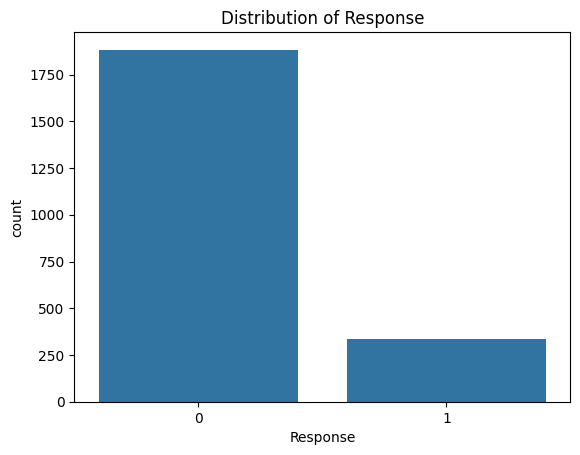

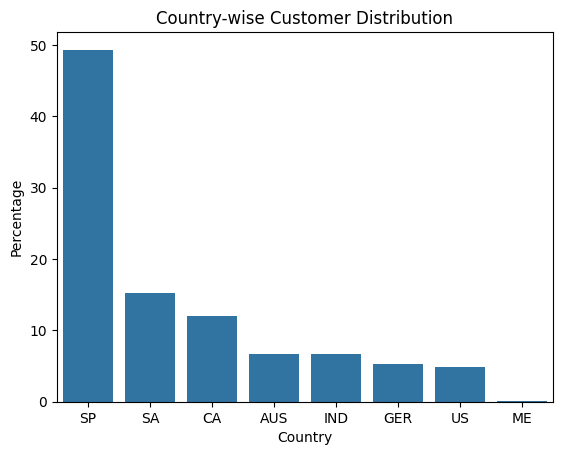

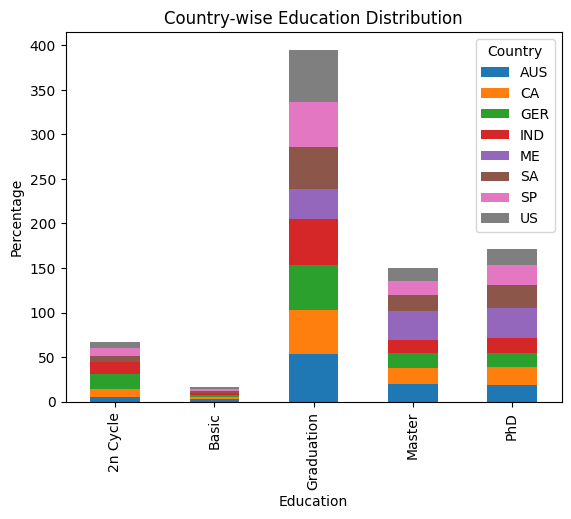

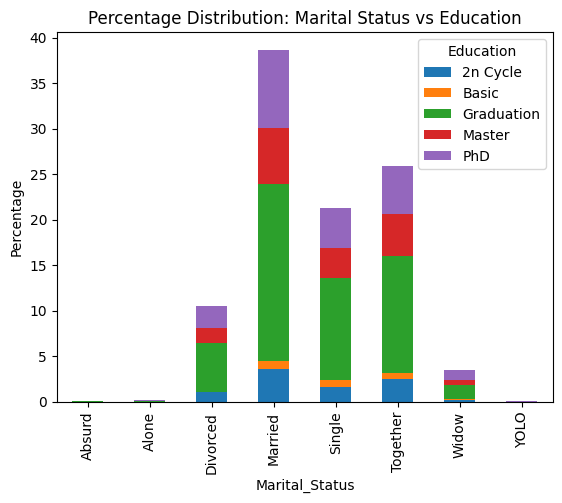

In [2]:
# Step 1: Distribution of the target variable
sns.countplot(x='Response', data=df)
plt.title('Distribution of Response')
plt.show()

# Step 2: Percentage distribution of customers by country
country_dist = df['Country'].value_counts(normalize=True) * 100
sns.barplot(x=country_dist.index, y=country_dist.values)
plt.title('Country-wise Customer Distribution')
plt.ylabel('Percentage')
plt.show()

# Step 3: Qualification distribution country-wise
qualification_country = pd.crosstab(df['Education'], df['Country'], normalize='columns') * 100
qualification_country.plot(kind='bar', stacked=True)
plt.title('Country-wise Education Distribution')
plt.ylabel('Percentage')
plt.show()

# Step 4: Marital Status and Education Percentage Segment
marital_education = pd.crosstab(df['Marital_Status'], df['Education'], normalize=True) * 100
marital_education.plot(kind='bar', stacked=True)
plt.title('Percentage Distribution: Marital Status vs Education')
plt.ylabel('Percentage')
plt.show()


In [3]:
# Step 1: Drop unwanted columns
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Country', 'Education', 'Marital_Status']
df = df.drop(columns=columns_to_drop)

# Step 2: Encode categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 3: Split features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


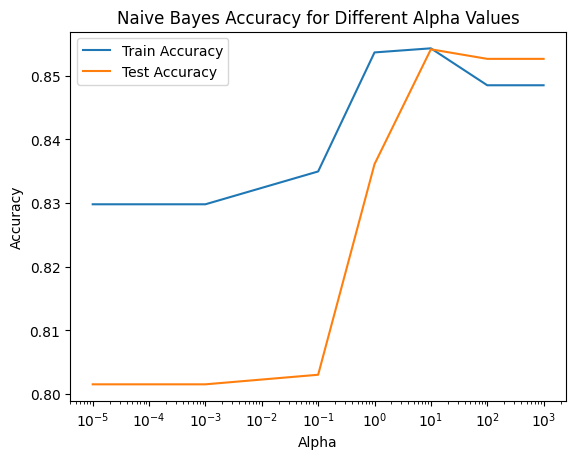

Best Alpha: 10
Accuracy: 0.8541353383458646
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       567
           1       1.00      0.01      0.02        98

    accuracy                           0.85       665
   macro avg       0.93      0.51      0.47       665
weighted avg       0.88      0.85      0.79       665



In [4]:
# Step 1: Train Naive Bayes with various alpha values
alpha_values = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]
train_accuracies = []
test_accuracies = []

for alpha in alpha_values:
    model = GaussianNB(var_smoothing=alpha)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Step 2: Plot error rates
plt.plot(alpha_values, train_accuracies, label='Train Accuracy')
plt.plot(alpha_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Naive Bayes Accuracy for Different Alpha Values')
plt.show()

# Step 3: Evaluate the best model
best_alpha = alpha_values[np.argmax(test_accuracies)]
model = GaussianNB(var_smoothing=best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Best Alpha: {best_alpha}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


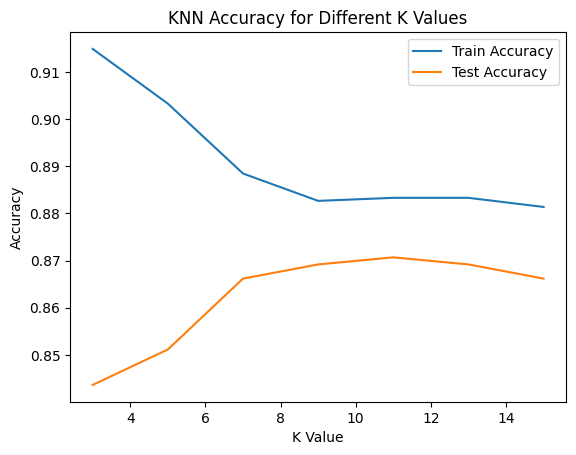

Best K: 11
Accuracy: 0.8706766917293233
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       567
           1       0.62      0.31      0.41        98

    accuracy                           0.87       665
   macro avg       0.76      0.64      0.67       665
weighted avg       0.85      0.87      0.85       665



In [5]:
# Step 1: Train KNN with various k values
k_values = [3, 5, 7, 9, 11, 13, 15]
train_accuracies = []
test_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Step 2: Plot error rates
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Accuracy for Different K Values')
plt.show()

# Step 3: Evaluate the best model
best_k = k_values[np.argmax(test_accuracies)]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Best K: {best_k}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


In [6]:
# Step 1: Train SVM with RBF kernel
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.8646616541353384
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       567
           1       0.59      0.27      0.37        98

    accuracy                           0.86       665
   macro avg       0.74      0.62      0.65       665
weighted avg       0.84      0.86      0.84       665



                    Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0             Naive Bayes  0.854135             1.000000          0.010204   
1     K-Nearest Neighbors  0.870677             0.625000          0.306122   
2  Support Vector Machine  0.864662             0.590909          0.265306   

   F1-Score (Class 1)   ROC-AUC  
0            0.020202  0.768671  
1            0.410959  0.807850  
2            0.366197  0.812169  


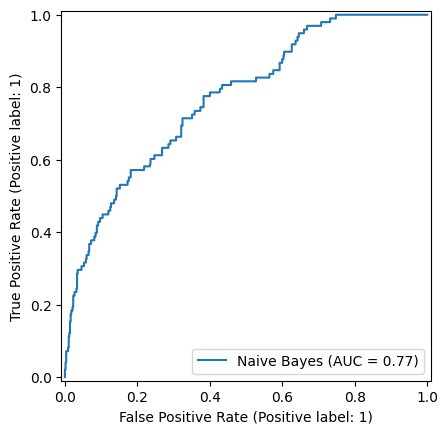

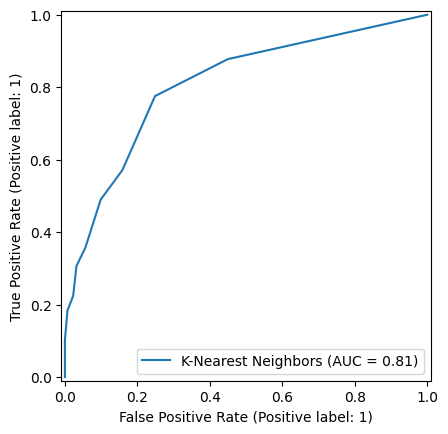

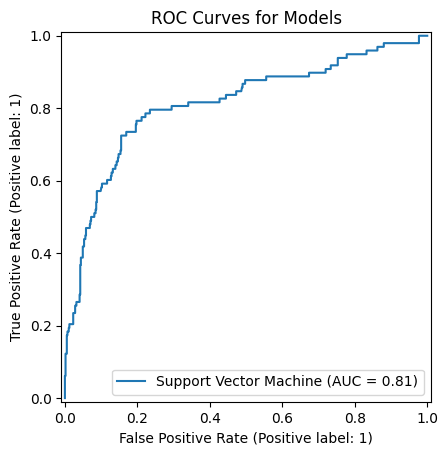

In [7]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, RocCurveDisplay

# Function to calculate and store model performance
def evaluate_model(model_name, y_true, y_pred, y_probs=None):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    roc_auc = None
    if y_probs is not None:
        roc_auc = roc_auc_score(y_true, y_probs[:, 1])

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-Score (Class 1)": report["1"]["f1-score"],
        "ROC-AUC": roc_auc
    }

# Train and evaluate Naive Bayes
nb_model = GaussianNB(var_smoothing=10)
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_y_probs = nb_model.predict_proba(X_test)
nb_results = evaluate_model("Naive Bayes", y_test, nb_y_pred, nb_y_probs)

# Train and evaluate K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_y_probs = knn_model.predict_proba(X_test)
knn_results = evaluate_model("K-Nearest Neighbors", y_test, knn_y_pred, knn_y_probs)

# Train and evaluate Support Vector Machine
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_y_probs = svm_model.predict_proba(X_test)
svm_results = evaluate_model("Support Vector Machine", y_test, svm_y_pred, svm_y_probs)

# Compile results into a DataFrame
import pandas as pd

results = pd.DataFrame([nb_results, knn_results, svm_results])
print(results)

# Plot ROC curves
RocCurveDisplay.from_estimator(nb_model, X_test, y_test, name="Naive Bayes")
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, name="K-Nearest Neighbors")
RocCurveDisplay.from_estimator(svm_model, X_test, y_test, name="Support Vector Machine")
plt.title("ROC Curves for Models")
plt.show()


The comparison highlights the performance of three classification models (Naive Bayes, K-Nearest Neighbors, and Support Vector Machine) on predicting customer responses:

**1. Accuracy**
K-Nearest Neighbors (KNN) achieved the highest accuracy at 87.07%, slightly outperforming the Support Vector Machine (SVM) at 86.47%, with Naive Bayes (NB) trailing at 85.41%.
However, accuracy alone may not reflect model quality, especially when the dataset is imbalanced.

**2. Precision (Class 1 - Positive Response)**
Naive Bayes: Achieved perfect precision (1.00), meaning all predicted positive responses were correct. However, its low recall indicates it predicted very few positives overall.

KNN: Precision is 62.5%, suggesting moderate reliability in identifying true positives.

SVM: Precision is 59.1%, slightly lower than KNN but still indicating reasonable performance.

**3. Recall (Class 1 - Positive Response)**
Naive Bayes: Extremely low recall (1.02%), meaning it identified almost none of the actual positive responses. This indicates a bias toward predicting negatives.

KNN: Recall is 30.61%, showing it captures more true positives than Naive Bayes but still misses many.

SVM: Recall is slightly lower at 26.53%, showing it is less sensitive to identifying actual positives compared to KNN.

**4. F1-Score (Class 1)**
F1-Score balances precision and recall:
Naive Bayes: Extremely low F1-Score (0.02) due to its poor recall, despite perfect precision.
KNN: Highest F1-Score (0.41), indicating a better trade-off between precision and recall.
SVM: Slightly lower F1-Score (0.37), suggesting it is less balanced than KNN for identifying positive responses.

**5. ROC-AUC**
Measures the overall ability of the model to distinguish between classes:
Naive Bayes: Lowest ROC-AUC (0.7687), suggesting poor separation between positive and negative responses.
KNN: Improved performance with an ROC-AUC of 0.8078, indicating it is better at distinguishing between the two classes.
SVM: Best ROC-AUC (0.8122), showing the strongest class separation overall.


               Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0      Random Forest  0.878195             0.673469          0.336735   
1  Gradient Boosting  0.882707             0.672414          0.397959   

   F1-Score (Class 1)   ROC-AUC  
0             0.44898  0.859599  
1             0.50000  0.854911  


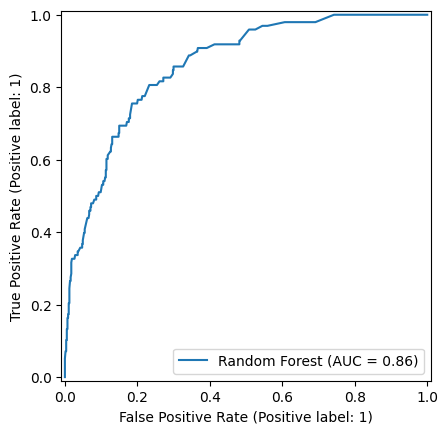

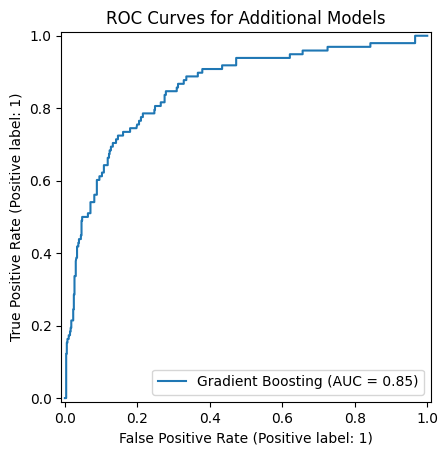

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, RocCurveDisplay

# Function to evaluate a model
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_probs[:, 1])

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-Score (Class 1)": report["1"]["f1-score"],
        "ROC-AUC": roc_auc
    }

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test)

# Train and evaluate Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_results = evaluate_model("Gradient Boosting", gb_model, X_train, y_train, X_test, y_test)

# Compile results into a DataFrame
additional_results = pd.DataFrame([rf_results, gb_results])
print(additional_results)

# Plot ROC curves for the additional models
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(gb_model, X_test, y_test, name="Gradient Boosting")
plt.title("ROC Curves for Additional Models")
plt.show()


**Accuracy:**

Gradient Boosting (88.27%) slightly outperformed Random Forest (87.82%), but both are competitive with earlier models.

**Precision (Class 1):**

Both Random Forest and Gradient Boosting models achieved similar precision (~67%), indicating reliable identification of true positives among predicted positives.

**Recall (Class 1):**

Gradient Boosting had higher recall (39.8%) compared to Random Forest (33.7%), meaning it identified more actual positive responses, albeit still missing many.

**F1-Score (Class 1):**

Gradient Boosting achieved the highest F1-Score (0.50), suggesting the best balance between precision and recall among all models tested.

**ROC-AUC:**

Random Forest achieved a slightly better ROC-AUC (0.860) compared to Gradient Boosting (0.855), indicating slightly better discrimination between classes.

**Insight:** Gradient Boosting emerges as the most balanced model overall, with the highest F1-Score and competitive performance in accuracy, precision, and recall.

Random Forest is slightly less balanced but remains robust, achieving the highest ROC-AUC among all models.

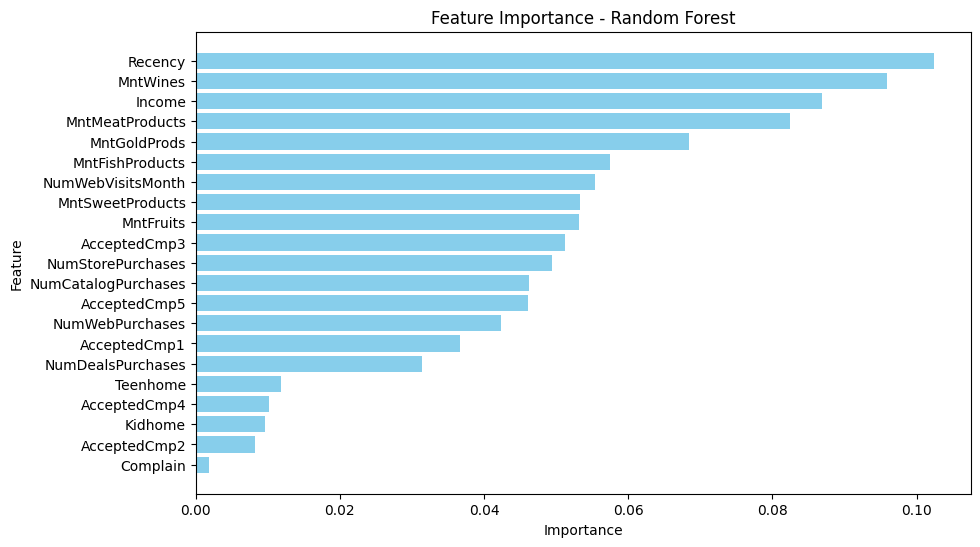

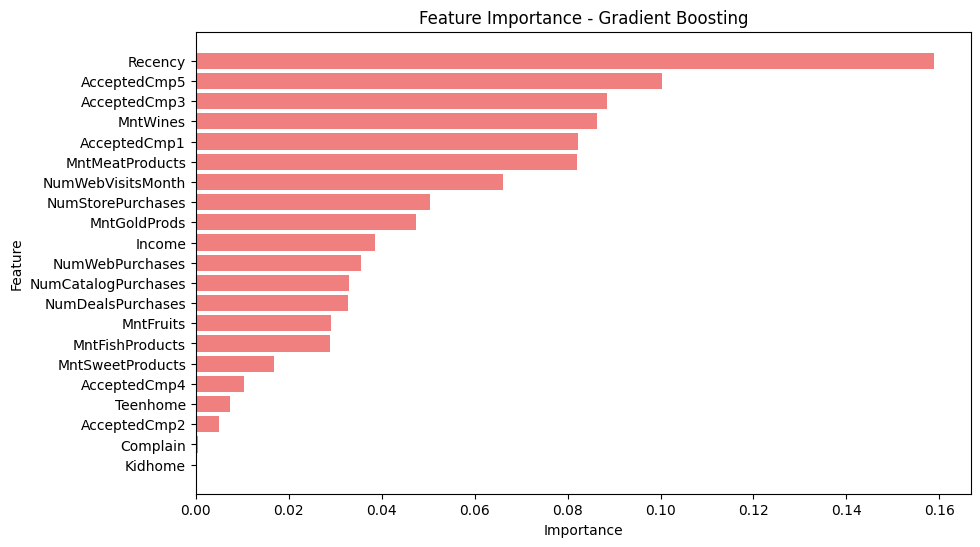

                Feature  Random Forest Importance  \
3               Recency                  0.102404   
17         AcceptedCmp5                  0.046092   
15         AcceptedCmp3                  0.051166   
4              MntWines                  0.095847   
18         AcceptedCmp1                  0.036607   
6       MntMeatProducts                  0.082419   
14    NumWebVisitsMonth                  0.055377   
13    NumStorePurchases                  0.049381   
9          MntGoldProds                  0.068493   
0                Income                  0.086866   
11      NumWebPurchases                  0.042387   
12  NumCatalogPurchases                  0.046164   
10    NumDealsPurchases                  0.031430   
5             MntFruits                  0.053112   
7       MntFishProducts                  0.057473   
8      MntSweetProducts                  0.053252   
16         AcceptedCmp4                  0.010163   
2              Teenhome                  0.011

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_names = df.drop('Response', axis=1).columns

# Extract feature importance from Random Forest
rf_importance = rf_model.feature_importances_
rf_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

# Extract feature importance from Gradient Boosting
gb_importance = gb_model.feature_importances_
gb_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_features['Feature'], rf_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(gb_features['Feature'], gb_features['Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Combine and compare feature importance
combined_importance = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': rf_importance,
    'Gradient Boosting Importance': gb_importance
}).sort_values(by='Gradient Boosting Importance', ascending=False)

print(combined_importance)


**Targeted Marketing Strategy Based on Feature Insights**

Based on the feature importance analysis, we can develop a focused marketing strategy that targets the most relevant customer segments for the upcoming product launch.

**1. Customer Segmentation**

  A. High Engagement Customers (Recent Purchasers)

  Target Group: Customers with low Recency (i.e., recent purchasers).
  Insight: Customers who have made recent purchases are highly likely to respond to new product offers.
  Marketing Strategy:
  Personalized Offers: Send personalized email campaigns or push notifications highlighting the new product, offering a special discount or exclusive pre-order deal.
  Loyalty Programs: Engage them with loyalty points for making a purchase of the new product or for referring a friend.

  B. Repeat Campaign Responders

  Target Group: Customers who accepted past campaigns (AcceptedCmp1, AcceptedCmp3, AcceptedCmp5).
  Insight: These customers have shown a higher likelihood of responding to marketing campaigns, which means they are already familiar with the company’s offerings.
  Marketing Strategy:
  VIP Campaigns: Offer exclusive access to the new product, such as early bird promotions or limited-time bundles.
  Customer Journey Mapping: Personalize offers based on the previous campaigns they responded to, emphasizing how the new product aligns with their past preferences.

  C. High-Spending Customers (High Spend on Specific Products)

  Target Group: Customers who have spent significantly on MntWines, MntMeatProducts, MntFishProducts, and MntGoldProds.
  Insight: Customers with high spending in specific product categories are more likely to respond to the new product if it aligns with their interests.
  Marketing Strategy:
  Product Bundling: Bundle the new product with their most frequently purchased items, like a wine package or meat products, to increase purchase likelihood.
  Upsell Strategy: Promote the new product as a premium option for those who typically spend more on high-value items.

  D. Frequent Online Shoppers

  Target Group: Customers with a high number of NumWebVisitsMonth, NumWebPurchases, and NumStorePurchases.
  Insight: These customers are highly engaged with the website and have a strong purchasing behavior across online channels.
  Marketing Strategy:
  Retargeting Campaigns: Utilize targeted retargeting ads to remind these customers of the new product they might be interested in.
  Exclusive Online Discounts: Offer them special online-only promotions or free shipping to incentivize quick adoption of the new product.

**2. Marketing Channels**

  A. Email Campaigns

  Target: High engagement customers and repeat campaign responders.
  Content: Highlight the product’s benefits, introduce exclusive offers for loyal customers, and encourage quick adoption with time-limited discounts.

  B. Social Media and Digital Advertising

  Target: Frequent online shoppers and high spenders on specific products.
  Content: Use visually rich content (e.g., videos and carousel ads) to showcase how the new product fits into their existing purchase habits. Leverage paid social media ads for retargeting based on website visits.

  C. Website Personalization

  Target: Frequent web visitors and high-spending customers.
  Content: Use personalized product recommendations based on their previous purchasing history (e.g., “Since you bought wine frequently, check out our latest wine-related product!”).

  D. Loyalty Program

  Target: All customers who show high engagement or high spend.
  Content: Offer loyalty points for interacting with the campaign, making purchases, or referring the product to others.

**3. Messaging and Offers**

  A. Exclusive Offers for High Engagement Segments

  Offer Type: Early access or exclusive discounts for customers who are recent or repeat responders to campaigns.
  Message: “As one of our most loyal customers, we want to offer you early access to our new product launch! Get an exclusive 20% discount for the next 48 hours.”

  B. Upsell and Cross-Sell for High-Spending Segments

  Offer Type: Premium product bundles for customers who have spent significantly on wine, meat, or other categories.
  Message: “We’ve curated a special bundle just for you, combining our new product with the best of what you love. Save 15% when you purchase today!”

  C. Retargeting for Frequent Web Visitors

  Offer Type: Online-exclusive deals or free shipping for customers who are frequent online shoppers.
  Message: “We noticed you’ve been browsing our site—why not take the next step? Enjoy free shipping on your order today!”

**4. Measurement & Adjustments**

  A. KPIs to Track:

  Conversion Rate: Measure how many targeted customers are making a purchase based on the personalized campaign.
  Customer Retention Rate: Track the loyalty of customers who responded to the campaign and return for future purchases.
  Average Order Value (AOV): Measure how the targeted promotions (e.g., product bundles) affect overall spending.

  B. Optimization:

  Regularly analyze the campaign performance and adjust the messaging based on which segments are responding best.
  Test different offers or product bundles to see what resonates most with each segment.

**5. Budget Allocation**

High-Engagement Segments (Recent Purchasers): Allocate a higher percentage of the budget for exclusive offers or early access campaigns.
Frequent Online Shoppers: Invest in retargeting ads and exclusive online deals.
High-Spending Customers: Allocate a budget for premium product bundles or VIP loyalty programs.

**Summary**

By focusing on high-engagement customers, repeat campaign responders, and those with specific spending habits, this strategy tailors marketing efforts to customers who are most likely to respond. The use of personalized offers, targeted digital campaigns, and loyalty programs maximizes the chances of successfully launching the new product.